In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# add parent dir to path so we can import from src
sys.path.append(os.path.abspath('..'))

from src.ingestion.ims_loader import load_raw_file, parse_filename_timestamp
from src.features.signal_math import calculate_time_domain_features

# configure plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_context("notebook", font_scale=1.2)
%matplotlib inline

In [2]:
# define paths to a known early file (healthy) and late file (broken)
# note: adjust these filenames if your raw folder has different specific names
# usually the first file is healthy, last file is broken.

data_dir = '../data/raw'
files = sorted([f for f in os.listdir(data_dir) if f != '.DS_Store'])

early_file = os.path.join(data_dir, files[0])
late_file = os.path.join(data_dir, files[-1])

print(f"Healthy sample: {files[0]}")
print(f"Critical sample: {files[-1]}")

# load data using our ingestion script
healthy_signal = load_raw_file(early_file)
broken_signal = load_raw_file(late_file)

Healthy sample: 2004.02.12.10.32.39
Critical sample: 2004.02.19.06.22.39


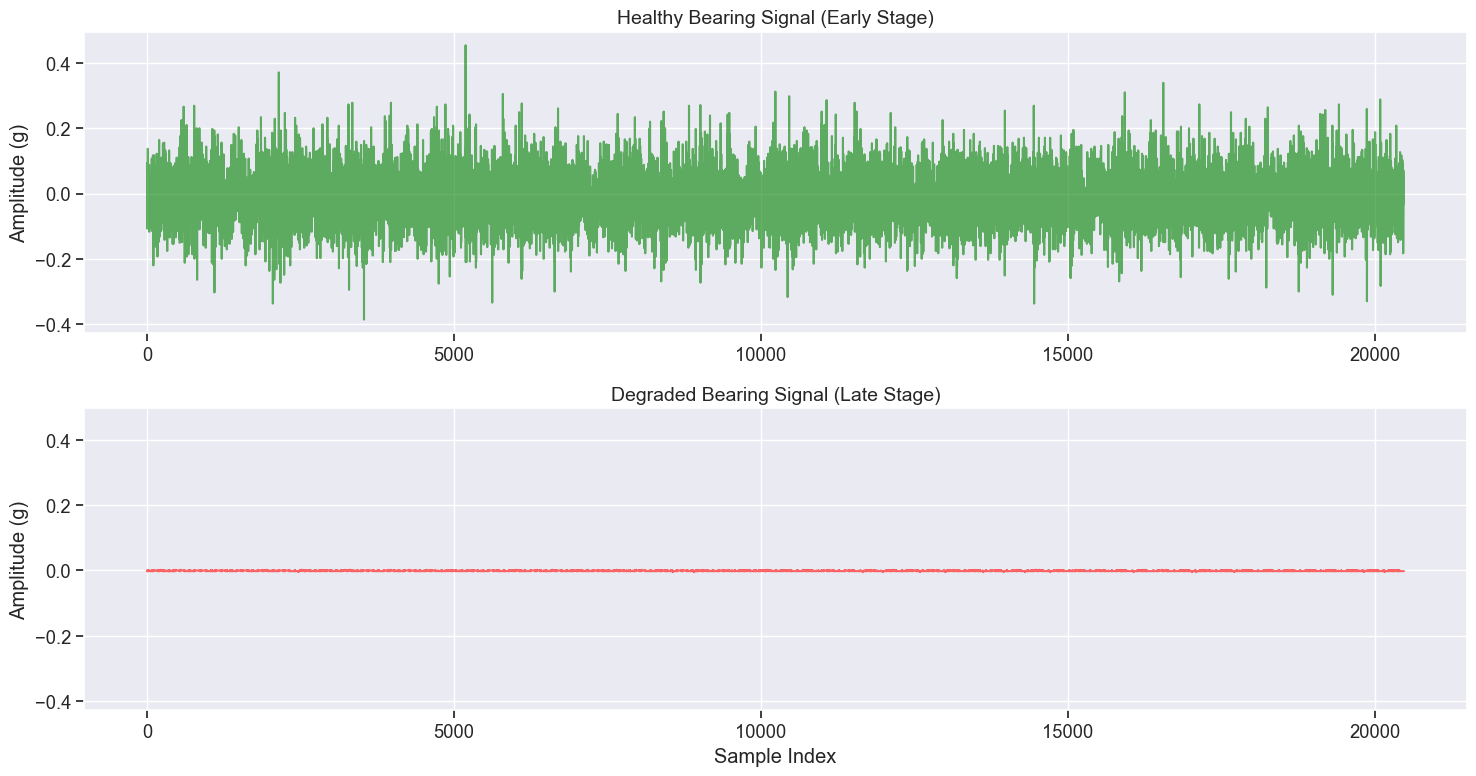

In [3]:
# plot the raw vibration waveforms
fig, axes = plt.subplots(2, 1, figsize=(15, 8), sharey=True)

# healthy
axes[0].plot(healthy_signal, color='green', alpha=0.6)
axes[0].set_title('Healthy Bearing Signal (Early Stage)', fontsize=14)
axes[0].set_ylabel('Amplitude (g)')

# broken
axes[1].plot(broken_signal, color='red', alpha=0.6)
axes[1].set_title('Degraded Bearing Signal (Late Stage)', fontsize=14)
axes[1].set_ylabel('Amplitude (g)')
axes[1].set_xlabel('Sample Index')

plt.tight_layout()
plt.show()

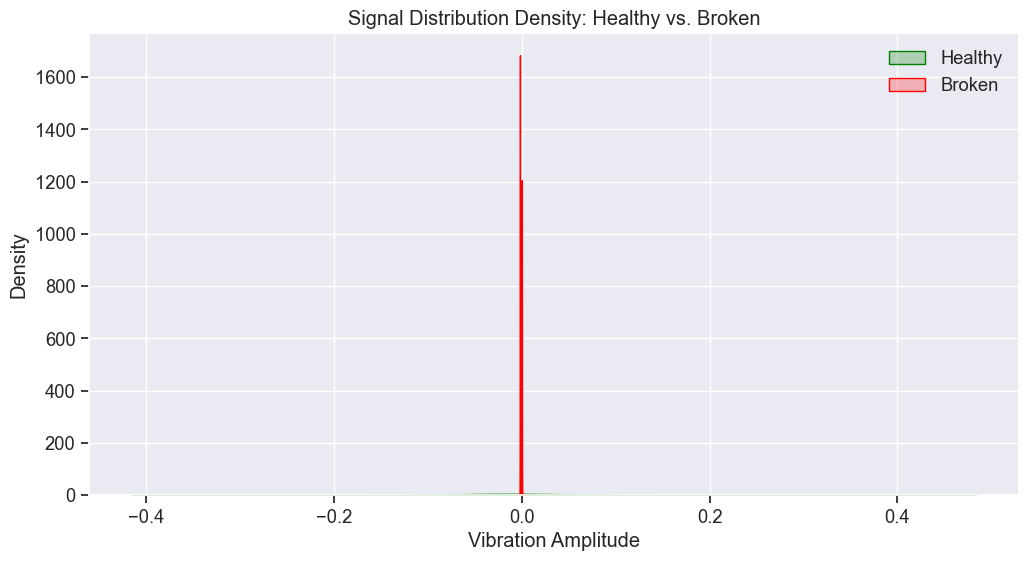

In [4]:
# compare the distribution of values (histogram)
plt.figure(figsize=(12, 6))
sns.kdeplot(healthy_signal, color='green', label='Healthy', fill=True)
sns.kdeplot(broken_signal, color='red', label='Broken', fill=True)
plt.title('Signal Distribution Density: Healthy vs. Broken')
plt.xlabel('Vibration Amplitude')
plt.legend()
plt.show()